In [14]:
import pandas as pd  # for dataframes and associated methods
import seaborn  # to visualization correlation
import matplotlib.pyplot as mp  # to visualize correlation
from sklearn.model_selection import train_test_split  # to split training / testing data
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import r2_score  # to score output model

train_df = pd.read_csv('train.csv')  # pull in the data
test_df = pd.read_csv('test.csv')

/tmp/ipykernel_205111/1365606076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = seaborn.heatmap(train_df.corr(), cmap="YlGnBu", annot=False)


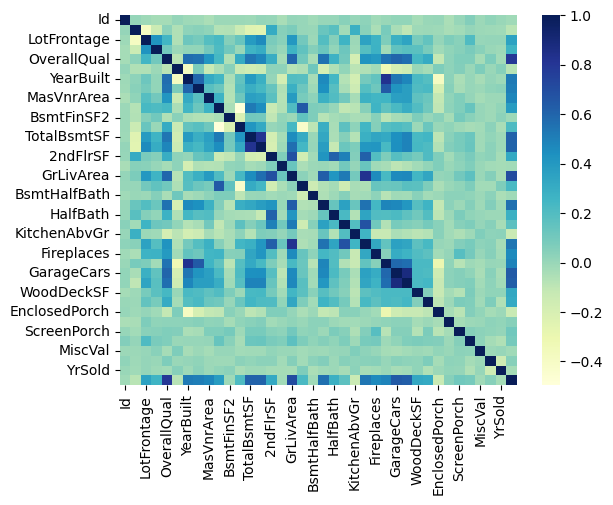

In [15]:
plot = seaborn.heatmap(train_df.corr(), cmap="YlGnBu", annot=False)
mp.show()

In [16]:
def return_numeric_columns(df):
    return [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

In [17]:
numberic_columns = return_numeric_columns(train_df)
print(numberic_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [26]:
def return_string_columns(df):
    numeric_columns = return_numeric_columns(df)
    return [x for x in df.columns if x not in numeric_columns]
def drop_id_column(lst):
    return [x for x in lst if x != 'Id']
def drop_id_column_df(df):
    return df.drop('Id', axis=1)

In [19]:
for col in drop_id_column(return_numeric_columns(train_df)):
    train_df[col] = train_df[col].interpolate()
    
def interpolate_numerical_columns(df):
    for col in drop_id_column(return_numeric_columns(df)):
         df[col] = df[col].interpolate()
    return df

In [20]:
train_df = pd.get_dummies(train_df, columns=return_string_columns(train_df))

def create_dummy_variables(df):
    return pd.get_dummies(df, columns=return_string_columns(df))

In [21]:
train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

""" split the data set """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
""" make a regression"""
reg = LinearRegression().fit(X_train,y_train)
"""create predictions based on the test data set"""
predictions = reg.predict(X_test)
""" compare the predictions to the actual values"""
r2_score(predictions, y_test)

0.8831495617000727

In [28]:
def return_regression(df):
    X = df.drop(['SalePrice'], axis=1)
    y = df['SalePrice']

    """ split the data set """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
    """ make a regression"""
    reg = LinearRegression().fit(X_train,y_train)

    return reg


def run_regression(df, reg):
    predictions = reg.predict(df)
    return predictions

In [29]:
train_df = pd.read_csv('train.csv')

processed_train_df = train_df.pipe(drop_id_column_df) \
     .pipe(interpolate_numerical_columns) \
     .pipe(create_dummy_variables)

model = processed_train_df.pipe(return_regression)

In [30]:
model

LinearRegression()

In [32]:
def drop_sale_price(df):
    return df.drop('SalePrice', axis=1)

""" function that adds columns in train that aren't in test and sets the same order """
def add_missing_columns(train_df, test_df):
    missing_cols = list(set(list(train_df)) - set(list(test_df)))
    for col in missing_cols:
        test_df[col] = 0

    test_df = test_df[list(train_df)]
        
    return test_df

In [34]:
test_df = pd.read_csv('test.csv')

processed_test_df = test_df.pipe(drop_id_column_df) \
.pipe(interpolate_numerical_columns) \
.pipe(create_dummy_variables)

processed_test_df = add_missing_columns(processed_train_df, processed_test_df)
processed_test_df = drop_sale_price(processed_test_df)

""" run the regression """
results = run_regression(processed_test_df, model)

In [35]:
"""create a dataframe from the output list and output to a file"""
id_list = list(range(1461, 2920))
result_df = pd.DataFrame(list(zip(id_list, results)), columns=['Id', 'SalePrice'])

result_df.to_csv('results.csv', index=False)

In [49]:
result_df

,Id,SalePrice
0,1461,110154.670094
1,1462,155383.703189
2,1463,187231.273258
3,1464,196443.061975
4,1465,201573.363992
...,...,...
1454,2915,86914.859865
1455,2916,75485.292089
1456,2917,176764.200728
1457,2918,116377.913611


In [55]:
# now that we tested with regression model, lets try xgboost using sci-kit learn
from xgboost import XGBRegressor

# read train.csv
train_df = pd.read_csv('train.csv')

# drop id column
train_df = train_df.drop('Id', axis=1)

# interpolate numerical columns
# train_df = interpolate_numerical_columns(train_df)

# create dummy variables
train_df = create_dummy_variables(train_df)

# split the data set
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# create xgboost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(processed_test_df)

In [63]:
id_list = list(range(1461, 2920))
result_df = pd.DataFrame(list(zip(id_list, xgb_predictions)), columns=['Id', 'SalePrice'])

result_df.to_csv('results_xg.csv', index=False)